In [1]:
#Loading libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading the Data
train = pd.read_csv("/content/drive/MyDrive/Linear_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Linear_test.csv")

In [6]:
train = (train - np.min(train)) / (np.max(train) - np.min(train))
test = (test - np.min(test)) / (np.max(test) - np.min(test))

In [7]:
X = train.values[:, :-1]
Y = train.values[:, -1].reshape(train.values.shape[0], 1)

X_test = test.values[:, :-1]
Y_test = test.values[:, -1].reshape(test.values.shape[0], 1)

In [8]:
class LinReg:
  def train(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((21,1))
    cost_list = []
    
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        
        cost_list.append(cost)
        
        if(i%(iteration/10) == 0):
            print('Cost is:',cost)
            
    return theta, cost_list

  def costPlot(cost, iters):
        plt.plot(np.arange(iters), cost, '-b', LineWidth=2)
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost J')
        plt.show()

  def predict(X, w):
        return X.dot(w) 

  def rmse(predictions, targets):
      return np.sqrt(((predictions - targets) ** 2).mean())

In [11]:
theta, cost_list = LinReg.train(X, Y, 0.3, 1000)

Cost is: 0.13368343512225278
Cost is: 0.00019538079957751646
Cost is: 0.00013529880176499774
Cost is: 0.0001348184935925967
Cost is: 0.00013481445680872778
Cost is: 0.00013481442137932252
Cost is: 0.0001348144210573663
Cost is: 0.00013481442105436244
Cost is: 0.00013481442105433384
Cost is: 0.0001348144210543336


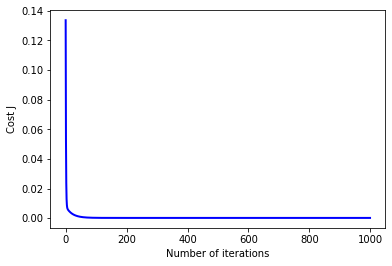

In [13]:
LinReg.costPlot(cost_list,1000)

In [12]:
y_pred = LinReg.predict(X_test,theta)
rmse = LinReg.rmse(y_pred, Y_test)
print('RMSE error is',rmse)

RMSE error is 0.018603701832905543
